# Predicting Apple Stock Potential from Apple Leaks

Idea:
Train classifier to predict stock trend for the next n days after a week, n tbd.
Input:
- Keywords
- leak sentiment -> Zero shot, manual validation
- financial trend
- stock price of previous day / Average Stock prive of previous Lag
- Accuracy of the Leaker -> How credible is the leak

## Introduction

## Approach

## The Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

leaks_df: pd.DataFrame = pd.read_csv('./datasets/apple_leaks/Each_Leak/Each_Leak.csv')
leaks_df

,Name,Accuracy,Link of Leaker Dashboard,Description,Img,Status,Leak,Leak Link
0,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,No 11-inch Mini-LED iPad Pro in 2022,NaN
1,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...
2,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...
3,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...
4,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...
...,...,...,...,...,...,...,...,...
1072,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,4G iPhone 12 will cost ~$800,https://www.businessinsider.com/apple-iphone-1...
1073,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...
1074,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...
1075,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will ship in “early October”,https://9to5mac.com/2020/06/16/apple-analyst-n...


In [2]:
leaks_df.dropna(inplace=True)
leaks_df

,Name,Accuracy,Link of Leaker Dashboard,Description,Img,Status,Leak,Leak Link
1,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...
2,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...
3,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...
4,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...
5,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...
...,...,...,...,...,...,...,...,...
1072,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,4G iPhone 12 will cost ~$800,https://www.businessinsider.com/apple-iphone-1...
1073,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...
1074,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...
1075,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will ship in “early October”,https://9to5mac.com/2020/06/16/apple-analyst-n...


<AxesSubplot: title={'center': 'Number of Leaks per Leaker'}>

/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128031 (\N{FISH}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/

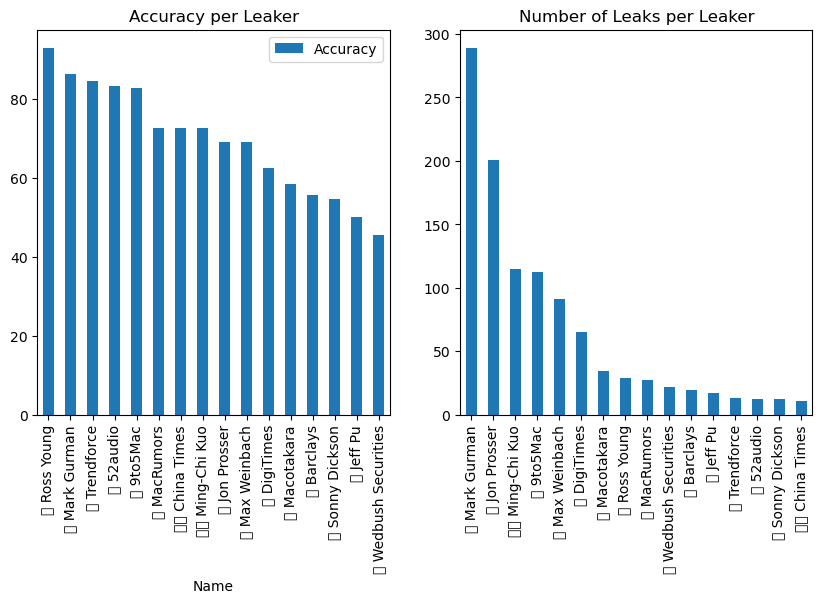

In [3]:

fig, ax = plt.subplots(1,2, figsize=(10,5))

leaks_df['Accuracy'] = leaks_df.Accuracy.str.rstrip('%').astype(float)
leaks_df[['Accuracy', 'Name']].drop_duplicates().plot(x='Name', y='Accuracy', kind='bar', title='Accuracy per Leaker', ax=ax[0])
leaks_df.Name.value_counts().plot.bar(title='Number of Leaks per Leaker', ax=ax[1])

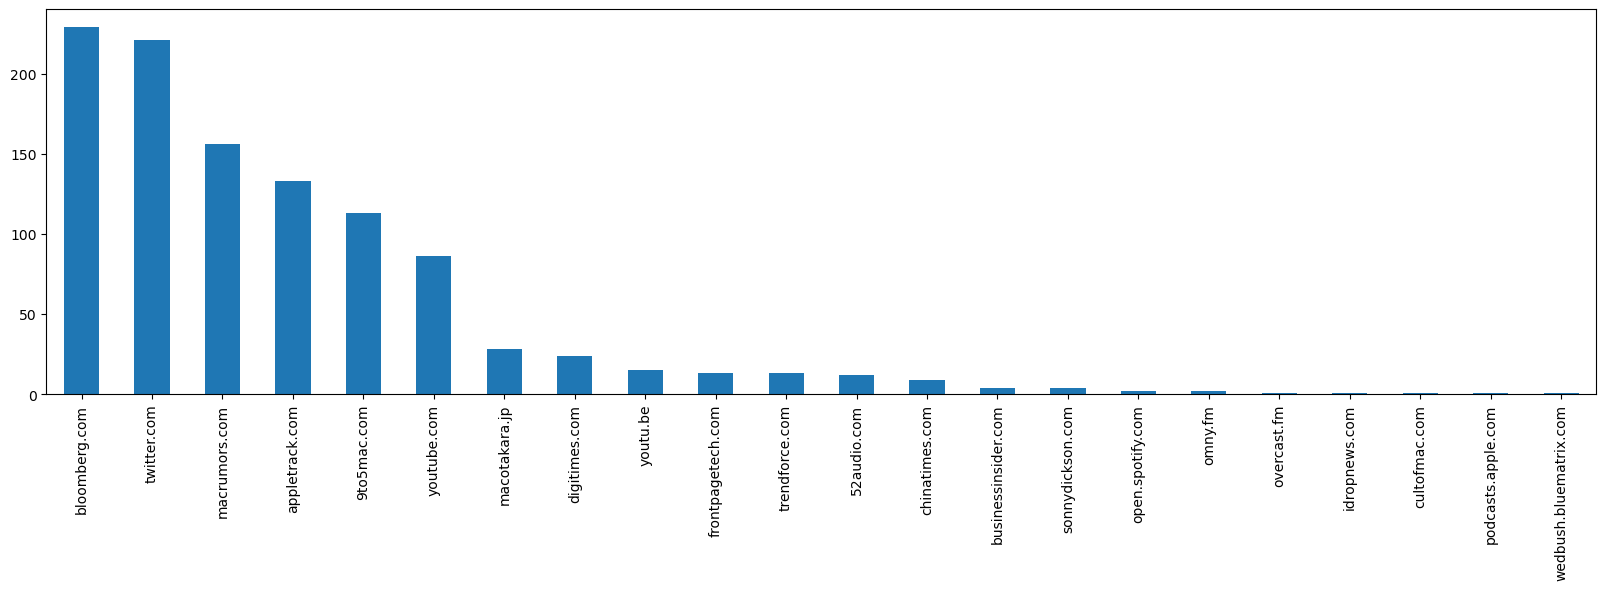

In [4]:
import re
leaks_df["domain"] = leaks_df["Leak Link"].apply(lambda x: re.search(r'(?:https?://|^)([^/]+)', str(x)).group(0).replace("https://", "").replace("www.", "").replace("http://", ""))
leaks_df["domain"].value_counts().plot.bar(figsize=(20,5))
plt.xticks(rotation='vertical')
plt.show()

-> Discuss why which platform has been scraped
-> Lay out why the platform name isn't considered as a suitable feature -> Domain Knowledge, the platform is not relevant, the leaker is

In [5]:
# Filter all domains which have < 50 occurences
domains_to_keep = leaks_df.domain.value_counts()[leaks_df.domain.value_counts() >= 100]
leaks_df = leaks_df[leaks_df.domain.isin(domains_to_keep.index)]
leaks_df

,Name,Accuracy,Link of Leaker Dashboard,Description,Img,Status,Leak,Leak Link,domain
1,🐟 Ross Young,92.9,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com
2,🐟 Ross Young,92.9,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com
3,🐟 Ross Young,92.9,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com
4,🐟 Ross Young,92.9,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com
5,🐟 Ross Young,92.9,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com
...,...,...,...,...,...,...,...,...,...
1067,🌳 Wedbush Securities,45.4,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com
1068,🌳 Wedbush Securities,45.4,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com
1073,🌳 Wedbush Securities,45.4,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com
1074,🌳 Wedbush Securities,45.4,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com


In [ ]:
"apple_track": "article:published_time" content="2022-03-10T07"
"twitter": "<time datetime="2022-01-31T18:20:18.000Z">7:20 pm · 31 Jan 2022</time>"
"bloomberg": "<time itemprop="datePublished" datetime="2022-01-30T14:45:12.893Z" data-locale="en">30 January 2022 at 15:45 CET</time>"
"9to5mac": "article:published_time" content="2021-04-05T23:"
"macrumors": "<time datetime="2020-03-19T08:19:54-07:00">Thursday March 19, 2020 8:19 am PDT</time>"

In [5]:
from tqdm import tqdm
import subprocess
from typing import List, Tuple
from datetime import datetime
import requests

def extract_dates_via_html():

    rgxs = {
        "appletrack.com": r'(?:published_time" content=")(\d{4}-\d{2}-\d{2})',
        "9to5mac.com": r'(?:published_time" content=")(\d{4}-\d{2}-\d{2})',
        "macrumors.com": r'(?:<time datetime=")(\d{4}-\d{2}-\d{2})',
    }

    links = leaks_df[["Leak Link", "domain"]][(leaks_df["domain"] != "twitter.com") & (leaks_df["domain"] != "bloomberg.com")].drop_duplicates()
    res: List[Tuple[str, datetime]] = []

    for idx, row in tqdm(links.iterrows()):
        html = requests.get(row["Leak Link"]).content
        match = re.search(rgxs[row["domain"]], str(html)).groups()[0]
        res.append((row["Leak Link"], datetime.strptime(match, '%Y-%m-%d')))

    res_df = pd.DataFrame(res, columns=["url", "datetime"])
    res_df.to_csv("./datasets/scraped_html_dates.csv", index=False)
    return res_df

def extract_dates_twitter():
    links: List = leaks_df["Leak Link"][leaks_df["domain"] == "twitter.com"].drop_duplicates().tolist()
    subprocess.run(["python", "scrape_date_from_twitter.py"] + links)
    twitter_dates = pd.read_csv("datasets/scraped_twitter_dates.csv")
    return twitter_dates

def extract_dates_bloomberg():
    links: List = leaks_df["Leak Link"][leaks_df["domain"] == "bloomberg.com"].drop_duplicates().tolist()
    subprocess.run(["python", "scrape_data_from_bloomberg.py"] + links)
    bloomberg_dates = pd.read_csv("datasets/scraped_bloomberg_dates.csv")
    return bloomberg_dates

extracted_html = extract_dates_via_html()
extracted_twitter = extract_dates_twitter()
extracted_bloomberg = extract_dates_bloomberg()
all_dates = pd.concat([
    extracted_html,
    extracted_twitter,
    extracted_bloomberg
])
all_dates

,url,datetime
0,https://twitter.com/DSCCRoss/status/1488215580...,2022-01-31 18:20:18+00:00
1,https://twitter.com/DSCCRoss/status/1481306555...,2022-01-12 16:46:18+00:00
2,https://twitter.com/DSCCRoss/status/1483106901...,2022-01-17 14:42:34+00:00
3,https://twitter.com/DSCCRoss/status/1450684151...,2021-10-20 04:43:48+00:00
4,https://twitter.com/DSCCRoss/status/1447980008...,2021-10-12 17:34:12+00:00
...,...,...
49,https://www.bloomberg.com/news/articles/2020-0...,2020-04-16
50,https://www.bloomberg.com/news/articles/2020-0...,2020-04-13
51,https://www.bloomberg.com/news/articles/2020-0...,2020-03-30
52,https://www.bloomberg.com/news/articles/2020-0...,2020-02-20


In [6]:
extracted_html = pd.read_csv("datasets/scraped_html_dates.csv")
extracted_bloomberg = pd.read_csv("datasets/scraped_bloomberg_dates.csv")
extracted_twitter = pd.read_csv("datasets/scraped_twitter_dates.csv")

all_dates = pd.concat([
    extracted_html,
    extracted_twitter,
    extracted_bloomberg
])
all_dates

,url,datetime
0,https://appletrack.com/studio-display-pro-with...,2022-03-10
1,https://appletrack.com/apple-investigating-20-...,2022-02-21
2,https://appletrack.com/no-foldable-iphone-unti...,2022-02-21
3,https://appletrack.com/revamped-imac-pro-to-la...,2022-02-14
4,https://appletrack.com/gurman-mac-studio-and-n...,2022-03-07
...,...,...
49,https://www.bloomberg.com/news/articles/2020-0...,2020-04-16
50,https://www.bloomberg.com/news/articles/2020-0...,2020-04-13
51,https://www.bloomberg.com/news/articles/2020-0...,2020-03-30
52,https://www.bloomberg.com/news/articles/2020-0...,2020-02-20


In [7]:
leaks_df = pd.merge(left=leaks_df, right=all_dates, left_on="Leak Link", right_on="url")
leaks_df.drop(columns=["url", "Img", "Description", "Link of Leaker Dashboard"], inplace=True)
leaks_df.dropna(inplace=True)
leaks_df

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime
0,🐟 Ross Young,92.9,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10
1,🐟 Ross Young,92.9,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10
2,🐟 Ross Young,92.9,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com,2022-02-21
3,🐟 Ross Young,92.9,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com,2022-02-21
4,🐟 Ross Young,92.9,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com,2022-02-14
...,...,...,...,...,...,...,...
847,🌳 Wedbush Securities,45.4,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19
848,🌳 Wedbush Securities,45.4,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19
849,🌳 Wedbush Securities,45.4,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com,2020-07-13
850,🌳 Wedbush Securities,45.4,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com,2020-06-16


<AxesSubplot: title={'center': 'Information extracted per Leak'}>

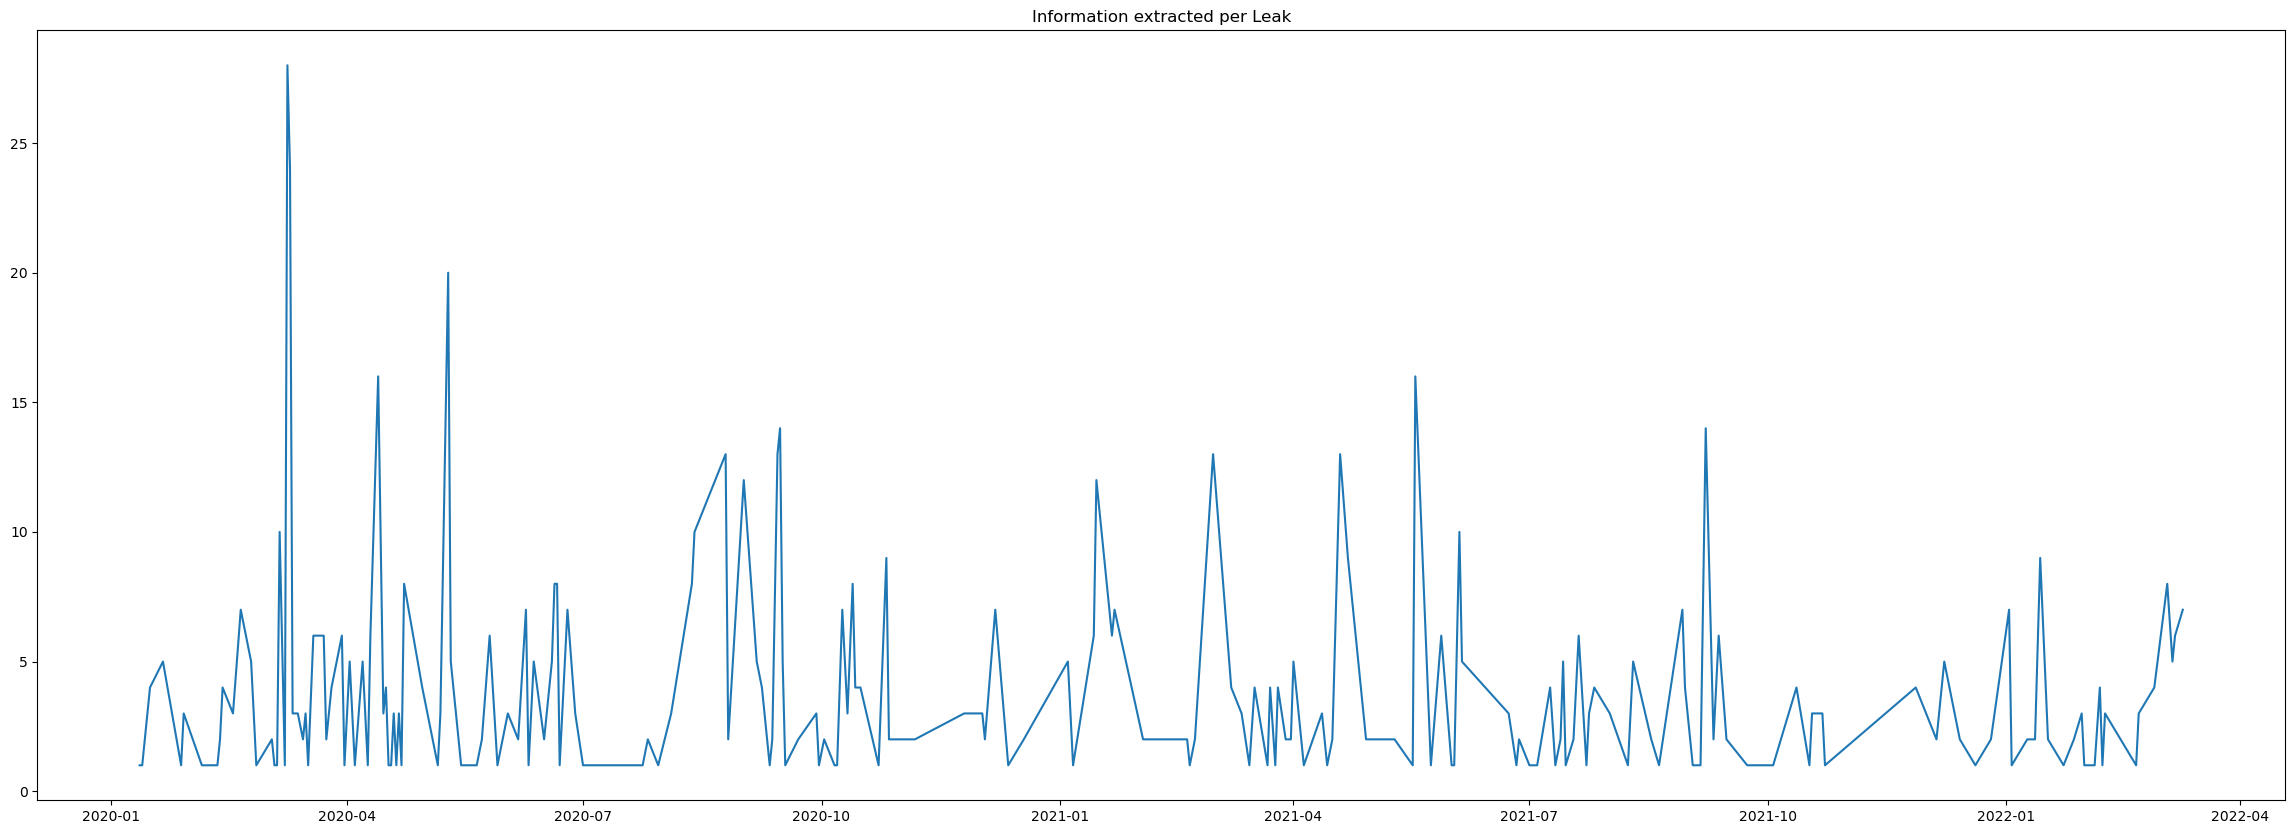

In [8]:
leaks_df.datetime = pd.to_datetime(leaks_df.datetime, utc=True)
leaks_df.datetime = leaks_df.datetime.dt.date
leaks_df.datetime.value_counts().sort_index().plot(figsize=(29,10), title="Information extracted per Leak")

-> One Leak article results in Multiple Leak Headlines. As a result, the stock price might be influenced by all leaks or by only one leak which is more significant. -> Test both assumptions: 1. model which ignores this, 2. model which tries to model the dependency between leaks on the same day.. maybe attention between leaks? Majority Voting for the sentiment? Here I can experiment a bit.

## Adding the stock data

In [9]:
stocks_df = pd.read_csv("datasets/APPLE_STOCK_Final.csv")
stocks_df.Date = pd.to_datetime(stocks_df.Date)
stocks_df.set_index(stocks_df.Date, inplace=True, drop=True)
stocks_df.drop(columns='Date', inplace=True)
stocks_df

,Price,Open,High,Low,Volume
Date,,,,,
2023-05-12,172.57,173.62,174.06,171.00,45530000
2023-05-11,173.75,173.85,174.59,172.17,49510000
2023-05-10,173.55,173.02,174.03,171.90,53720000
2023-05-09,171.77,173.05,173.54,171.60,45330000
2023-05-08,173.50,172.48,173.85,172.11,55960000
...,...,...,...,...,...
1980-12-18,0.12,0.12,0.12,0.12,73450000
1980-12-17,0.12,0.12,0.12,0.12,86440000
1980-12-16,0.11,0.11,0.11,0.11,105730000


<AxesSubplot: xlabel='Date'>

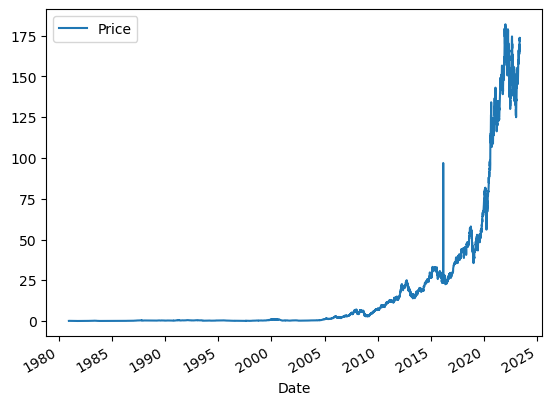

In [10]:
stocks_df.plot(y='Price')

<AxesSubplot: title={'center': 'Development of the share price in the timeframe given by the apple leaks dataset'}, xlabel='Date'>

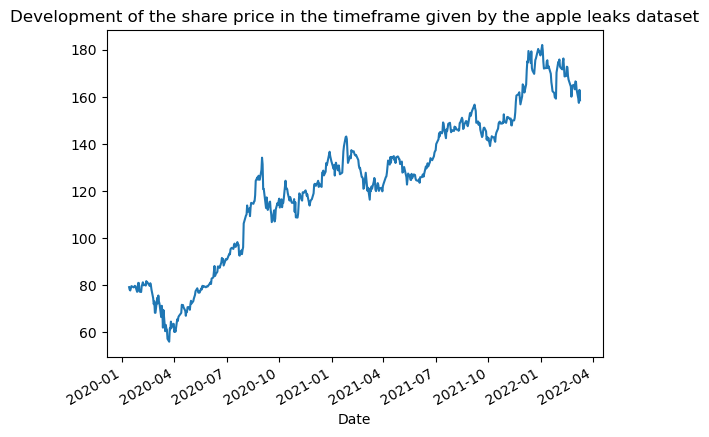

In [11]:
# Trim the data to the range we have leaks for
filtered_stocks = stocks_df[(stocks_df.index >= pd.to_datetime(leaks_df.datetime.min())) & (stocks_df.index <= pd.to_datetime(leaks_df.datetime.max()))].Price
filtered_stocks.plot(title='Development of the share price in the timeframe given by the apple leaks dataset')

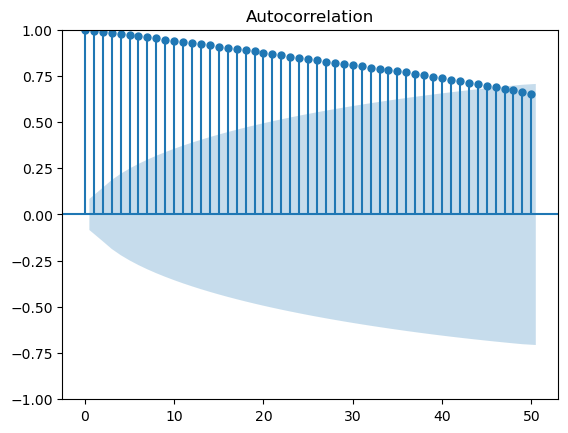

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(filtered_stocks, lags=50);

In [13]:
# Compose dataset of stock data before and after each leak
samples = leaks_df.groupby('Name').sample(1)
samples = samples.sort_values('Accuracy', ascending=False)
samples

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime
22,🐟 Ross Young,92.9,✅,iPhone SE 3 coming in 2022,https://twitter.com/DSCCRoss/status/1377677792...,twitter.com,2021-04-01
62,🏀 Mark Gurman,86.4,✅,2021 MacBook Pro coming in October,https://www.bloomberg.com/news/newsletters/202...,bloomberg.com,2021-10-03
333,🕘 9to5Mac,82.8,⏳,Pro Display XDR 2 will have A13 chip,https://appletrack.com/apple-pro-display-xdr-2...,appletrack.com,2021-07-24
431,❓ MacRumors,72.7,⏳,AirPods Pro 2 won’t have new bud design,https://www.macrumors.com/2021/10/22/airpods-p...,macrumors.com,2021-10-22
455,🇨🇳 China Times,72.7,⛔️,New iMac will be powered by A14T processor,https://appletrack.com/redesigned-imac-may-fea...,appletrack.com,2020-10-27
568,👨‍💻 Ming-Chi Kuo,72.5,⛔️,Smaller wireless charging mat coming in first ...,https://9to5mac.com/2020/01/29/kuo-forecasts-n...,9to5mac.com,2020-01-29
734,🍍 Max Weinbach,69.0,✅,2020 iPhones will have same ultra-wide FOV,https://twitter.com/PineLeaks/status/125931661...,twitter.com,2020-05-10
658,🧻 Jon Prosser,69.0,⛔️,iOS will be called “iPhoneOS” again,https://twitter.com/jon_prosser/status/1273639...,twitter.com,2020-06-18
767,🔢 DigiTimes,62.5,✅,AirPods 3 will have Pro design but no ANC,https://www.macrumors.com/2020/04/21/airpods-p...,macrumors.com,2020-04-21
789,🧭 Macotakara,58.5,⛔️,AirTags have Apple Watch-like magnetic charging,https://www.macrumors.com/2020/02/24/airtags-w...,macrumors.com,2020-02-24


In [15]:
def calculate_trend(data: pd.DataFrame) -> pd.DataFrame:
    x = np.arange(len(data))
    slope, intercept = np.polyfit(x=x, y=data.Price.to_list(), deg=1)
    data['trend'] = slope * x + intercept
    return data, slope, intercept

/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128031 (\N{FISH}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/industrialApplicationsOfAI/lib/python3.9/site-packages/IPython/core/pyla

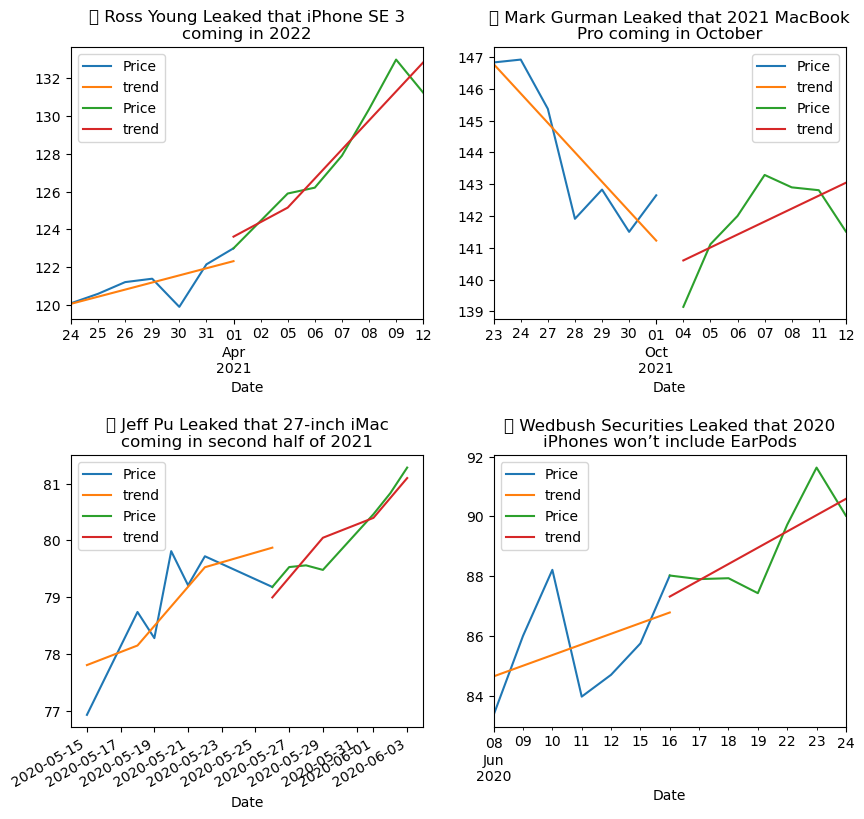

In [16]:
import textwrap
import numpy as np

lag_size = 7

fig, ax = plt.subplots(2,2, figsize=(10,10))

to_plot = pd.concat([samples[:2], samples[-2:]])
to_plot.reset_index(drop=True, inplace=True)
for index, row in to_plot.iterrows():
    before = filtered_stocks.loc[filtered_stocks.index <= pd.to_datetime(row.datetime)][:lag_size].sort_index().to_frame()
    after = filtered_stocks.loc[filtered_stocks.index >= pd.to_datetime(row.datetime)][-lag_size:].sort_index().to_frame()

    before, _, _ = calculate_trend(before)
    after, _, _ = calculate_trend(after)

    before.plot(ax=ax[index // 2, index % 2], y='Price')
    before.plot(ax=ax[index // 2, index % 2], y='trend')
    after.plot(ax=ax[index // 2, index % 2], y='Price')
    after.plot(ax=ax[index // 2, index % 2], y='trend')
    ax[index // 2, index % 2].set_title(textwrap.fill(f'{row.Name} Leaked that {row.Leak}', width=40))

fig.subplots_adjust(hspace=0.5)

-> Some lines do not look linear, this is because the spacing between dates is not even, which is because of weekends and holidays were the Stock market is closed

In [17]:
def compose_dataset(lag_size=7):
    slopes_before = []
    slopes_after = []
    for _, row in leaks_df.iterrows():
        before = stocks_df.loc[stocks_df.index <= pd.to_datetime(row.datetime)][:lag_size].sort_index().Price.to_frame()
        after = stocks_df.loc[stocks_df.index >= pd.to_datetime(row.datetime)][-lag_size:].sort_index().Price.to_frame()

        _, slope_before, _ = calculate_trend(before)
        _, slope_after, _ = calculate_trend(after)
        slopes_before.append(slope_before)
        slopes_after.append(slope_after)

    leaks_df['slopes_before'] = slopes_before
    leaks_df['slopes_after'] = slopes_after

compose_dataset()
leaks_df

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime,slopes_before,slopes_after
0,🐟 Ross Young,92.9,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071
1,🐟 Ross Young,92.9,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071
2,🐟 Ross Young,92.9,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com,2022-02-21,-0.368214,0.548571
3,🐟 Ross Young,92.9,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com,2022-02-21,-0.368214,0.548571
4,🐟 Ross Young,92.9,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com,2022-02-14,-0.688571,-1.736429
...,...,...,...,...,...,...,...,...,...
847,🌳 Wedbush Securities,45.4,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071
848,🌳 Wedbush Securities,45.4,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071
849,🌳 Wedbush Securities,45.4,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com,2020-07-13,0.742143,0.206071
850,🌳 Wedbush Securities,45.4,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com,2020-06-16,0.356071,0.544643


<AxesSubplot: title={'center': 'Number of times the sign of the slope changes after a leak'}>

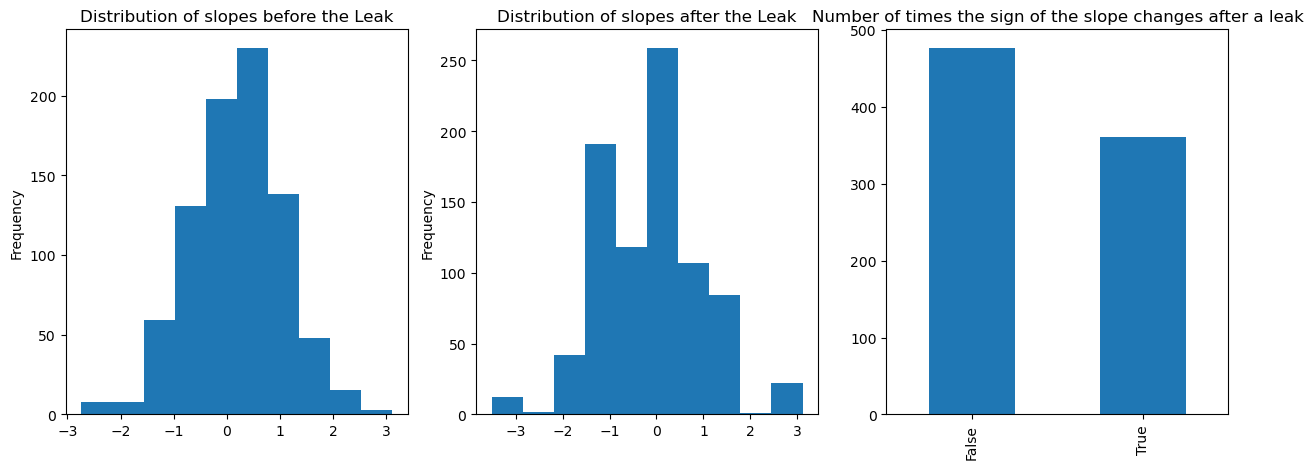

In [18]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
leaks_df.slopes_before.plot(ax=ax[0], title="Distribution of slopes before the Leak", kind='hist')
leaks_df.slopes_after.plot(ax=ax[1], title="Distribution of slopes after the Leak", kind='hist')
slope_change = leaks_df.apply(lambda row: (row.slopes_before > 0 and row.slopes_after < 0) or (row.slopes_before < 0 and row.slopes_after > 0), axis=1)
slope_change.value_counts().plot.bar(ax=ax[2], title="Number of times the sign of the slope changes after a leak")

<AxesSubplot: title={'center': 'Distribution of classes'}>

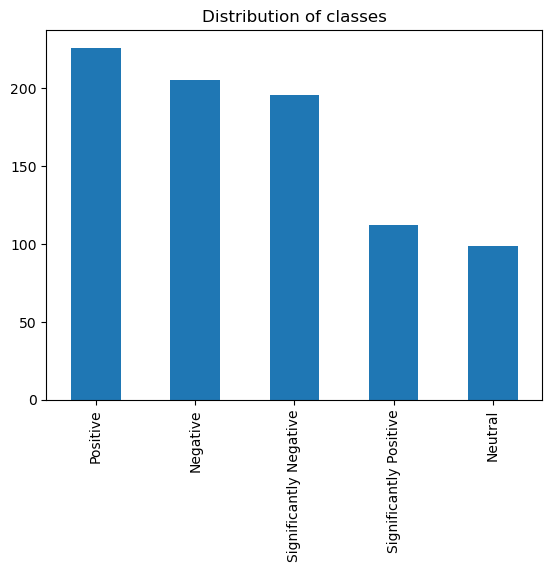

In [21]:
from utils import RangeDict

"""
Define 3/5 different classes:
1. Positive -> 0.1 < m < 1
2. Neutral -> -0.1 < m < 0.1
3. Negative -> -0.1 > m > -1
4. Significantly Positive -> m > 1
5. Significantly Negative -> m < -1
"""

classes = RangeDict({
    (0.1, 1): "Positive",
    (-0.1, 0.1): "Neutral",
    (-1, -0.1): "Negative",
    (1, np.inf): "Significantly Positive",
    (-np.inf, -1): "Significantly Negative"
})

leaks_df['class'] = leaks_df.slopes_after.apply(lambda x: classes[x])
leaks_df['class'].value_counts().plot.bar(title="Distribution of classes")

In [36]:
# Add stock price of previous day as feature
leaks_df['stock_of_prev_day'] = leaks_df.datetime.apply(lambda x: stocks_df.Price.loc[stocks_df.index <= pd.to_datetime(x)][0])
leaks_df

,Name,Accuracy,Status,Leak,Leak Link,domain,datetime,slopes_before,slopes_after,class,stock_of_prev_day
0,🐟 Ross Young,92.9,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52
1,🐟 Ross Young,92.9,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com,2022-03-10,-1.300357,1.326071,Significantly Positive,158.52
2,🐟 Ross Young,92.9,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30
3,🐟 Ross Young,92.9,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com,2022-02-21,-0.368214,0.548571,Positive,167.30
4,🐟 Ross Young,92.9,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com,2022-02-14,-0.688571,-1.736429,Significantly Negative,168.88
...,...,...,...,...,...,...,...,...,...,...,...
847,🌳 Wedbush Securities,45.4,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84
848,🌳 Wedbush Securities,45.4,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com,2021-04-19,0.409286,0.096071,Neutral,134.84
849,🌳 Wedbush Securities,45.4,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com,2020-07-13,0.742143,0.206071,Positive,95.48
850,🌳 Wedbush Securities,45.4,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com,2020-06-16,0.356071,0.544643,Positive,88.02
